# Optimization Techniques in Machine Learning




# Bankruptcy Prediction Model  
''A Machine Learning-Driven Approach to Support Entrepreneurs in Decision-Making And Foster Entrepreneurial Resilience Rwanda''

Following is the implementation of a bankruptcy prediction model building in two phases;
- A classical ML model
- A neural network in different instances with varying hyperparameters like optimizers, regularizers, and early stopping.
-A comparison between the instances performances and between the best performing neural network with the classic ML model




# The Dataset
> ***Brief Description:***


While machine learning (ML) has been successfully applied in financial risk management globally, its adoption in Rwanda’s business environment remains limited. This project aims to develop an ML-driven bankruptcy prediction model that can enable entrepreneurs to proactively identify and mitigate financial risks.


The dataset used in this project includes various financial ratios and metrics that serve as features to predict the likelihood of bankruptcy.

This dataset is valuable for training machine learning models to identify patterns in financial data that could indicate a company's risk of bankruptcy, aiding investors, entrepeneurs, and financial institutions in making informed decisions.

***Link to the dataset: https://www.kaggle.com/code/ahmedtronic/company-bankruptcy-prediction***


# Classical Model Impemantation

In [44]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [45]:
# Loading the data

df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Data/Bankruptcy.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [46]:
# Inspectig the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [47]:
# Refining the naming of the columns to replace spaces in the feature names
df.columns = df.columns.str.strip()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


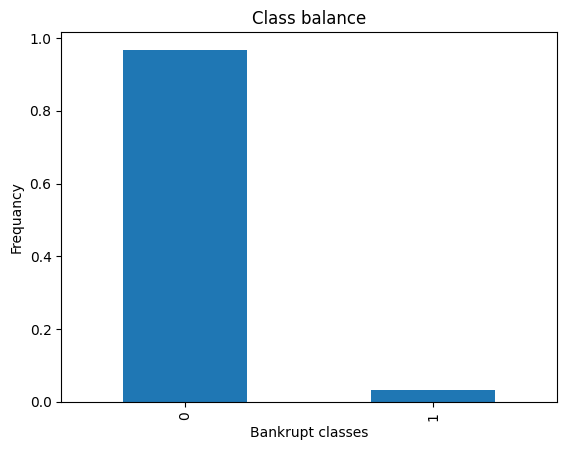

In [48]:
# Visulizing the data for instances like class imbalances

df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

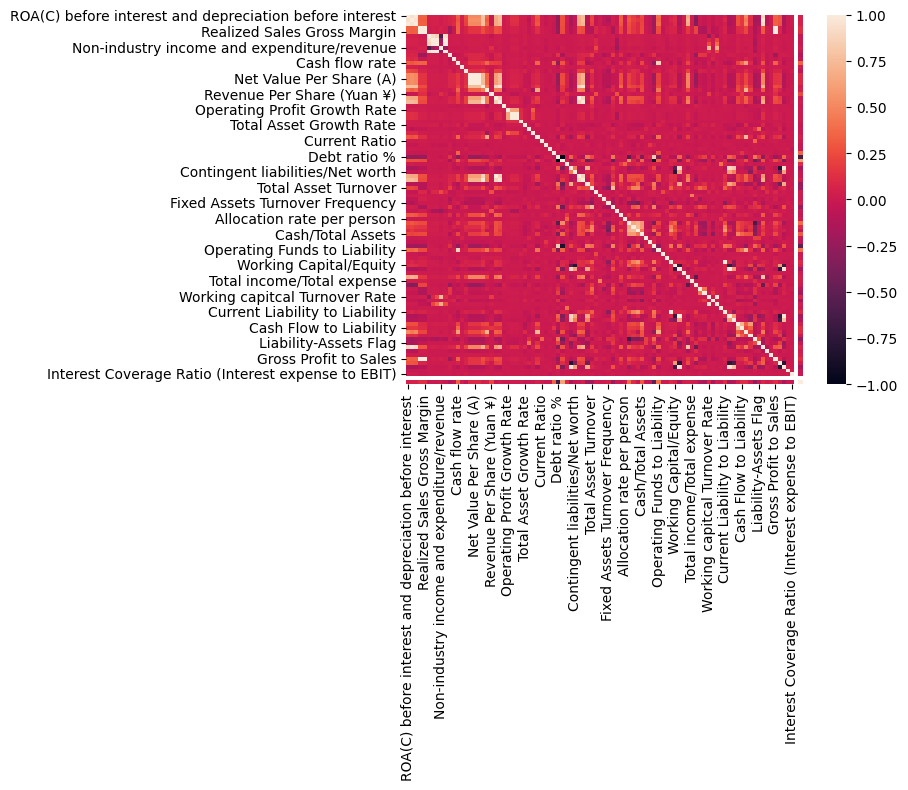

In [49]:
# Visualizing the correlation between features
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

In [50]:
# Splitting the data into features and target
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [51]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Resampling the data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((10558, 95), (10558,))

In [53]:
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_basic.predict(X_test)

# Evaluate performance
basic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1_score": f1_score(y_test, y_pred)
}

basic_metrics

{'Accuracy': 0.969208211143695,
 'Precision': 0.5384615384615384,
 'Recall': 0.3181818181818182,
 'F1_score': 0.4}

# Tuning The Hyperparameters

In [54]:
# Tuning The Hyperparameters
params= {

    "n_estimators":range(25, 100, 25),
    "max_depth": range(10, 60,10)

}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 60, 10)}

In [55]:
Tuned_model = GridSearchCV(

    rf_basic,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
Tuned_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [56]:
Tuned_model.fit(X_train_resampled , y_train_resampled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [57]:
cv_results = pd.DataFrame(Tuned_model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,3.964647,0.953121,0.035671,0.011917,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.991477,0.992424,0.997159,0.997158,0.994789,0.994602,0.002350,1
10,4.125760,1.184958,0.028372,0.001812,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.991477,0.991477,0.996686,0.997158,0.994315,0.994223,0.002440,2
11,5.536209,0.961455,0.046047,0.017867,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.991477,0.991951,0.996212,0.996684,0.994315,0.994128,0.002130,3
14,5.285056,0.711897,0.035137,0.005079,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991477,0.991951,0.996212,0.996684,0.994315,0.994128,0.002130,3
12,1.810608,0.195737,0.020574,0.003079,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.991004,0.991477,0.995739,0.995737,0.995737,0.993939,0.002208,5
9,1.792051,0.226584,0.018706,0.001561,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.990530,0.990057,0.995739,0.996210,0.995737,0.993655,0.002754,6
7,3.899084,0.501550,0.037129,0.012000,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.990057,0.990057,0.995265,0.995263,0.993842,0.992897,0.002376,7
8,5.406624,0.760846,0.043907,0.015236,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.990530,0.990530,0.994792,0.994315,0.993842,0.992802,0.001879,8
6,1.591328,0.049725,0.017610,0.000180,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.989110,0.988636,0.994792,0.993842,0.993842,0.992044,0.002617,9
4,3.496673,0.726202,0.026532,0.002349,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.982008,0.983428,0.993371,0.991000,0.990526,0.988066,0.004495,10


In [58]:
Tuned_model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [59]:
y_pred = Tuned_model.predict(X_test)

acc_train = Tuned_model.score(X_train_resampled , y_train_resampled)
acc_test = Tuned_model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.9699


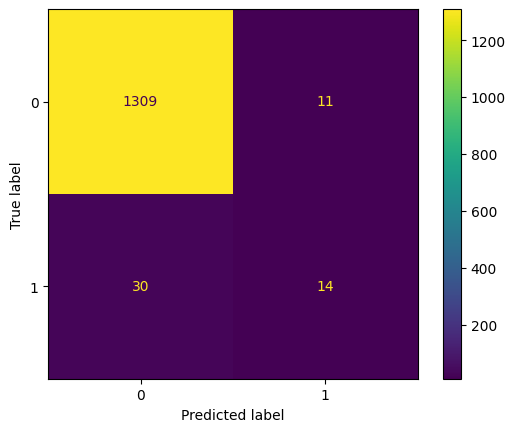

In [60]:
ConfusionMatrixDisplay.from_estimator(

    Tuned_model,
    X_test,
    y_test

);

In [61]:
print(classification_report(

    y_test,
    Tuned_model.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.56      0.32      0.41        44

    accuracy                           0.97      1364
   macro avg       0.77      0.65      0.70      1364
weighted avg       0.96      0.97      0.97      1364



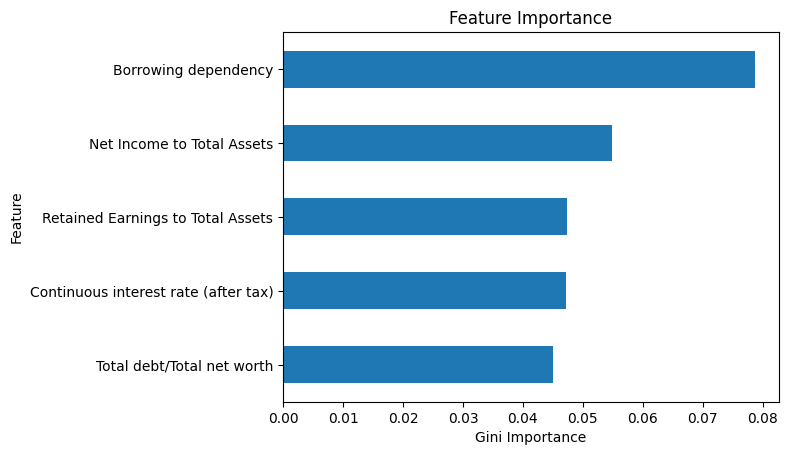

In [62]:
# Plotting the feature importances
features = X_test.columns
importances = Tuned_model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
# Save model
with open("model_random_classifier.pkl", "wb") as f:
    pickle.dump(Tuned_model, f)

# SECTION 2

 # Neural Network Implementation

 # Neural Network Architecture

 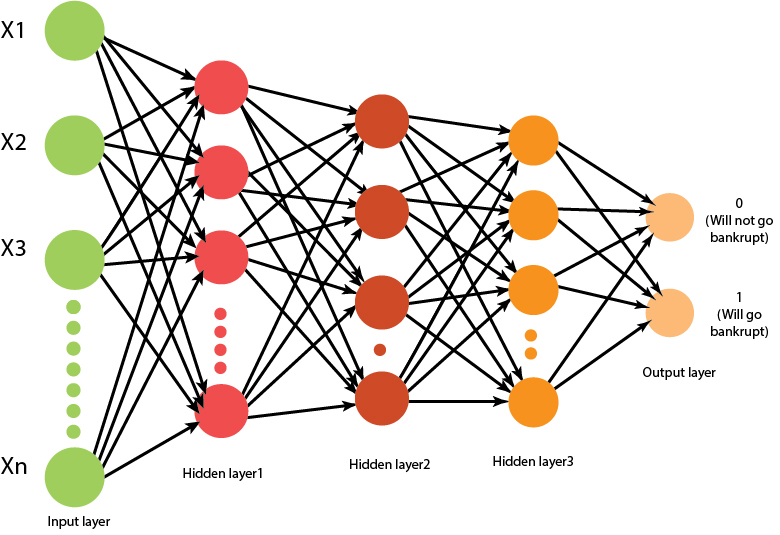


In [64]:
# Importing the necessary libraries for Model architecture and training process
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.metrics import Recall
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Re-Splitting The data To Create Validation Sets For The NN

In [65]:
scaler = StandardScaler()
# Preparing the Whole dataset for use in the model architecture.
Xn = df.drop('Bankrupt?', axis=1)
yn = df['Bankrupt?']

# Scaling the data
Xn_scaled = scaler.fit_transform(Xn)
# Putting it back into a dataframe
Xn_scaled_df = pd.DataFrame(Xn_scaled, columns=X.columns)

# Splitting the data into training and Validation and test sets
Xn_train_val, Xn_test, yn_train_val, yn_test = train_test_split(Xn_scaled_df, yn, test_size=0.15, random_state=42)
Xn_train, Xn_val, yn_train, yn_val = train_test_split(Xn_train_val, yn_train_val, test_size=0.15, random_state=42)

In [66]:
Xn_train.shape, yn_train.shape

((4926, 95), (4926,))

### Instance 1: Plain Model Without Any Optimizer or Regularizer or Early stopping

In [67]:
def plain_model():
    model = Sequential([
    Dense(128, activation='relu', input_shape=(Xn_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

    # Compile the model without specifying optimizer or metrics
    model.compile(loss='binary_crossentropy')

    return model

In [68]:
# Instantiate the model
model1 = plain_model()

# Display model summary
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history1 = model1.fit(Xn_train, yn_train, validation_data=(Xn_val, yn_val), epochs=10, batch_size=15)

# evaluate the model
train_loss = model1.evaluate(Xn_train, yn_train, verbose=0) # Get only the loss value
test_loss = model1.evaluate(Xn_test, yn_test, verbose=0) # Get only the loss value
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))  # Print the losses

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1952 - val_loss: 0.0895
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1092 - val_loss: 0.0954
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0766 - val_loss: 0.1036
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0866 - val_loss: 0.1019
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0895 - val_loss: 0.1002
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0889 - val_loss: 0.0975
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0716 - val_loss: 0.1007
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0687 - val_loss: 0.0996
Epoch 9/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0679 - val_loss: 0.1121
Epoch 10/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0687 - val_loss: 0.1028
Train Loss: 0.063, Test Loss: 0.227


In [70]:
yn_pred1 = (model1.predict(Xn_test) > 0.5).astype("int32")

# Calculate each metric
accuracy = accuracy_score(yn_test, yn_pred1)
precision = precision_score(yn_test, yn_pred1)
recall = recall_score(yn_test, yn_pred1)
f1 = f1_score(yn_test, yn_pred1)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9550
Precision: 0.4211
Recall: 0.1860
F1 Score: 0.2581


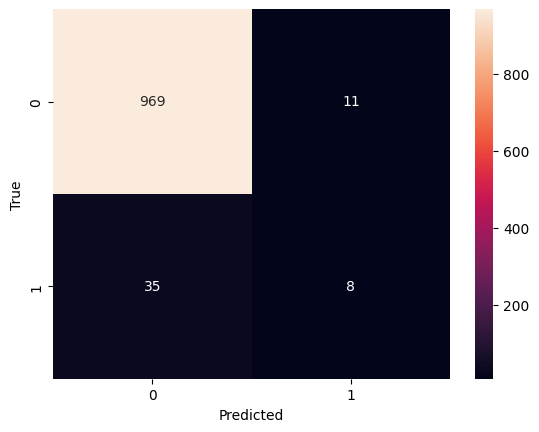

In [71]:
cm = confusion_matrix(yn_test, yn_pred1)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

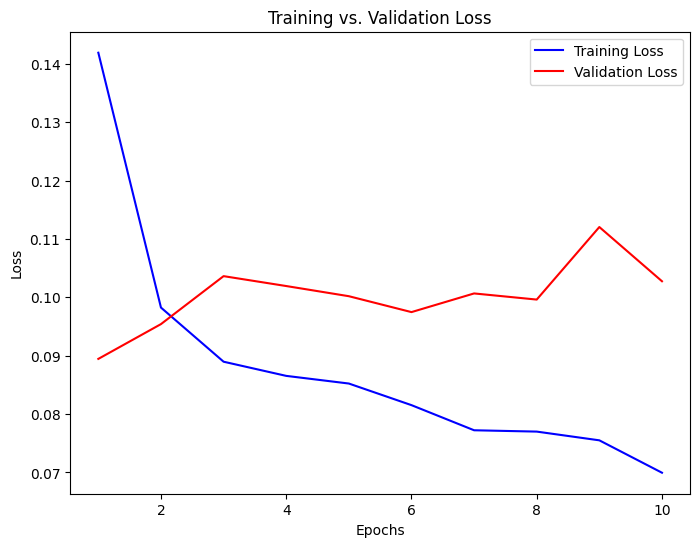

In [72]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs = range(1, len(loss1) + 1) # Use loss1 instead of loss

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss1, 'b', label='Training Loss') # Use loss1 instead of loss
plt.plot(epochs, val_loss1, 'r', label='Validation Loss') # Use val_loss1 instead of val_loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

# SECTION 3

# Optimization and Regularization Combinations

# Defining functions that creates, Trains, Evaluates, And Plots models With specified Optimization techniques

In [73]:

def create_model(layer_sizes, activations, dropouts, regularizers, optimizer, learning_rate, input_shape):
    model = Sequential()

    # Input layer
    model.add(Dense(layer_sizes[0], activation=activations[0], kernel_regularizer=regularizers[0], input_shape=(input_shape,)))
    if dropouts[0]:
        model.add(Dropout(dropouts[0]))

    # Hidden layers
    for size, activation, dropout, reg in zip(layer_sizes[1:], activations[1:], dropouts[1:], regularizers[1:]):
        model.add(Dense(size, activation=activation, kernel_regularizer=reg))
        if dropout:
            model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Setting optimizers
    optimizers = {
        "adam": Adam(learning_rate=learning_rate),
        "rmsprop": RMSprop(learning_rate=learning_rate),
        "nadam": Nadam(learning_rate=learning_rate),
        "adagrad": Adagrad(learning_rate=learning_rate)
    }

    model.compile(optimizer=optimizers[optimizer], loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [81]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32, patience=10):

  '''A function that trains models'''
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

  history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=epochs,
      batch_size=batch_size,
      callbacks=[es],
      verbose=1
    )

  return history


In [77]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print(f'Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [78]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()


### Instance 2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 512)                 │          49,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,697 (866.00 KB)

 Trainable params: 221,697 (866.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9583 - loss: 13.5961 - val_accuracy: 0.9667 - val_loss: 2.1150
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9702 - loss: 1.3919 - val_accuracy: 0.9678 - val_loss: 0.3672
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9713 - loss: 0.2852 - val_accuracy: 0.9678 - val_loss: 0.1631
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9741 - loss: 0.1241 - val_accuracy: 0.9678 - val_loss: 0.1283
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9730 - loss: 0.1012 - val_accuracy: 0.9678 - val_loss: 0.1134
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9705 - loss: 0.0999 - val_accuracy: 0.9678 - val_loss: 0.1120
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9711 - loss: 0.1020 - val_accuracy: 0.9678 - val_loss: 0.1094
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9676 - loss: 0.1012 - val_accuracy: 

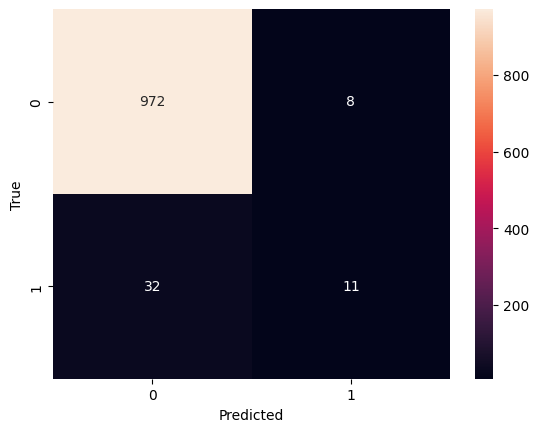

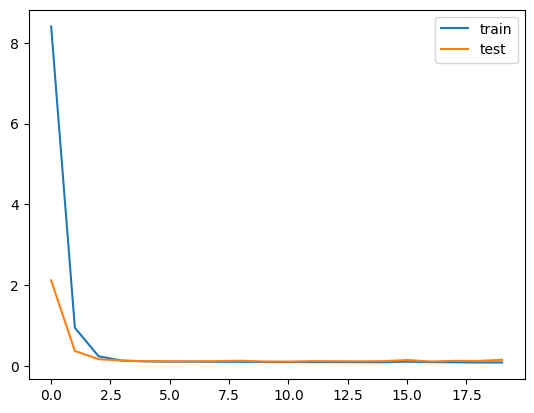

In [82]:
model2 = create_model(
    layer_sizes=[512, 256, 128, 64],
    activations=['relu', 'relu', 'relu', 'relu'],
    dropouts=[0.2, 0.2, 0.2, None],
    regularizers=[None, l2(0.05), None, l2(0.05)],
    optimizer='adam',
    learning_rate=0.0005,
    input_shape=Xn_train.shape[1]
)
model2.summary()

history2 = train_model(model2, Xn_train, yn_train, Xn_val, yn_val, epochs=20, batch_size=32, patience=10)
evaluate_model(model2, Xn_train, yn_train, Xn_test, yn_test)
plot_loss(history2)


### Instance 3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 128)                 │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,657 (88.50 KB)

 Trainable params: 22,657 (88.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6980 - loss: 0.6132 - val_accuracy: 0.9678 - val_loss: 0.2849
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9709 - loss: 0.2771 - val_accuracy: 0.9678 - val_loss: 0.1855
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.1820 - val_accuracy: 0.9678 - val_loss: 0.1568
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9704 - loss: 0.1766 - val_accuracy: 0.9678 - val_loss: 0.1385
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9712 - loss: 0.1586 - val_accuracy: 0.9678 - val_loss: 0.1242
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9712 - loss: 0.1436 - val_accuracy: 0.9678 - val_loss: 0.1168
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9702 - loss: 0.1498 - val_accuracy: 0.9678 - val_loss: 0.1102
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9670 - loss: 0.1266 - val_accuracy: 0

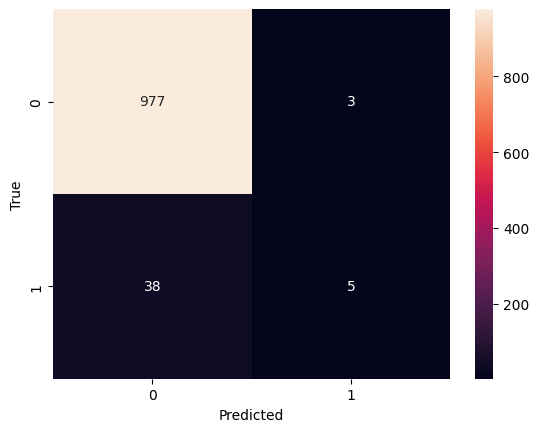

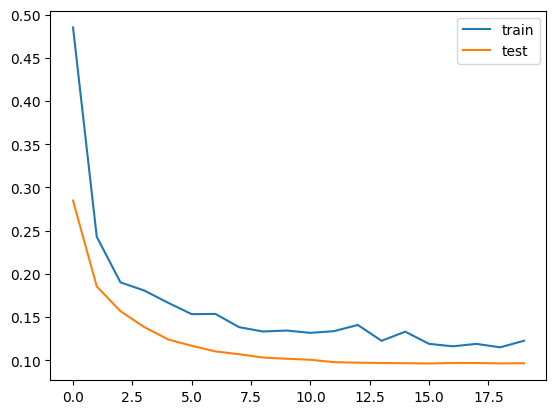

In [89]:
model3 = create_model(
    layer_sizes=[128, 64, 32],
    activations=['relu', 'relu', 'relu'],
    dropouts=[0.4, 0.3, None],
    regularizers=[l2(0.00001)] * 3,
    optimizer='rmsprop',
    learning_rate=0.0001,
    input_shape=Xn_train.shape[1]
)
model3.summary()

history3 = train_model(model3, Xn_train, yn_train, Xn_val, yn_val, epochs=20, batch_size=32, patience=10)
evaluate_model(model3, Xn_train, yn_train, Xn_test, yn_test)
plot_loss(history3)


### Instance 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                     │ (None, 128)                 │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7252 - loss: 0.5580 - val_accuracy: 0.9678 - val_loss: 0.1692
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9673 - loss: 0.2062 - val_accuracy: 0.9678 - val_loss: 0.1276
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9723 - loss: 0.1448 - val_accuracy: 0.9678 - val_loss: 0.1137
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9682 - loss: 0.1418 - val_accuracy: 0.9690 - val_loss: 0.1091
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9659 - loss: 0.1275 - val_accuracy: 0.9667 - val_loss: 0.1061
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9746 - loss: 0.0967 - val_accuracy: 0.9678 - val_loss: 0.1038
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1120 - val_accuracy: 0.9678 - val_loss: 0.1050
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.1028 - val_accuracy: 0.

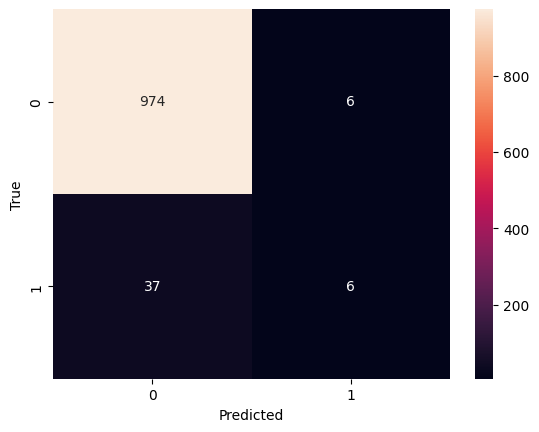

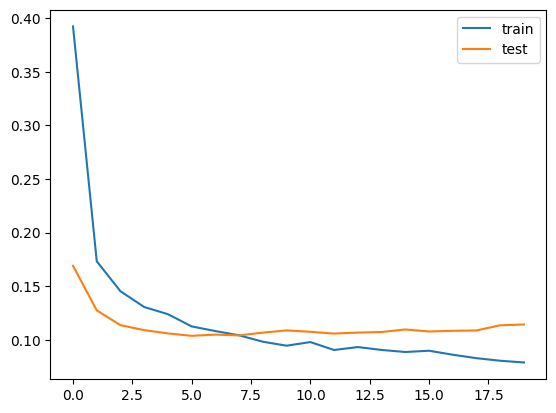

In [92]:
model4 = create_model(
    layer_sizes=[128, 64, 32, 16],
    activations=['relu', 'relu', 'relu', 'relu'],
    dropouts=[0.3, 0.3, 0.3, None],
    regularizers=[l2(0.00005)] * 4,
    optimizer='nadam',
    learning_rate=0.0002,
    input_shape=Xn_train.shape[1]
)
model4.summary()

history4 = train_model(model4, Xn_train, yn_train, Xn_val, yn_val, epochs=20, batch_size=16, patience=20)
evaluate_model(model4, Xn_train, yn_train, Xn_test, yn_test)
plot_loss(history4)


### Instance 5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 256)                 │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,841 (265.00 KB)

 Trainable params: 67,841 (265.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8458 - loss: 1.0693 - val_accuracy: 0.9678 - val_loss: 0.8874
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9665 - loss: 0.8666 - val_accuracy: 0.9678 - val_loss: 0.7788
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.7601 - val_accuracy: 0.9678 - val_loss: 0.7322
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9716 - loss: 0.7465 - val_accuracy: 0.9678 - val_loss: 0.7078
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9690 - loss: 0.7379 - val_accuracy: 0.9678 - val_loss: 0.6918
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9729 - loss: 0.7085 - val_accuracy: 0.9678 - val_loss: 0.6800
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9672 - loss: 0.7097 - val_accuracy: 0.9678 - val_loss: 0.6708
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9684 - loss: 0.6916 - val_accuracy: 0.

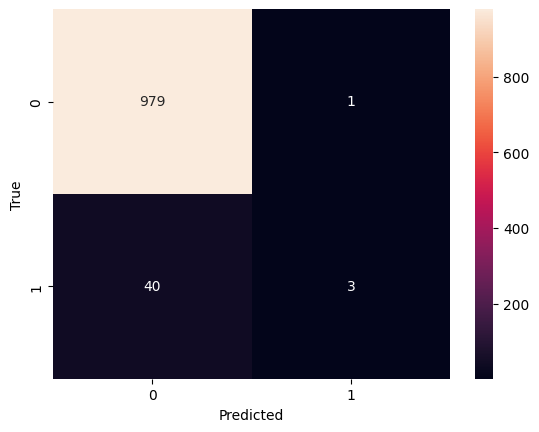

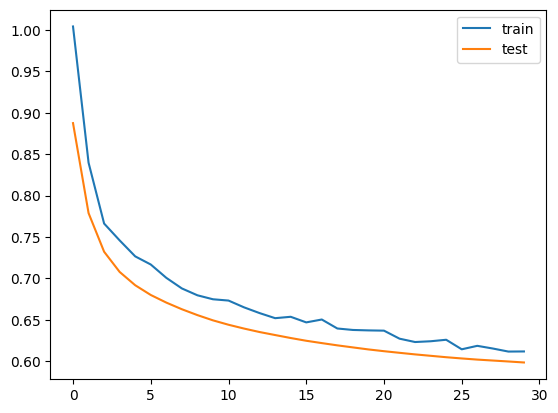

In [91]:
model5 = create_model(
    layer_sizes=[256, 128, 64, 32],
    activations=['relu', 'relu', 'relu', 'relu'],
    dropouts=[0.2, 0.3, 0.2, None],
    regularizers=[l1_l2(l1=0.0001, l2=0.0001)] * 4,
    optimizer='adagrad',
    learning_rate=0.001,
    input_shape=Xn_train.shape[1]
)
model5.summary()

history5 = train_model(model5, Xn_train, yn_train, Xn_val, yn_val, epochs=30, batch_size=32, patience=20)
evaluate_model(model5, Xn_train, yn_train, Xn_test, yn_test)
plot_loss(history5)


In [ ]:
# Saving the models
model1.save('model_NN_instance1.keras')
model2.save('model_NN_instance2.keras')
model3.save('model_NN_instance3.keras')
model4.save('model_NN_instance4.keras')
model5.save('model_NN_instance5.keras')

#Summary & Findings


-  *****Classical Model:***** The classical model did well in predicting bankruptcy with an accuracy of  97%. However, it performs far better in predicting the negative class with a precision of 98%, a recall of 99%, and an f1 -score of 98%. When predicting the positive class, these metrics drop drastically, where the precision falls to 56%, a recall of 0.32, and an f1-score of 41%. This was due to the dataset used which had a huge class imbalance, making the model learn far better from the negative class data than it did on the positive class.

  Another remark is the effect of the hyperparameters tuning which is slightly. Changed the accuracy of the model from 96% to 97%. The change was slight because the data did not much complexity as it turned out, except for the class imbalance challenge only.

    
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.56      0.32      0.41        44

           accuracy                           0.97      


- *****Neural Networks:*****  The neural networks were built while iterating different parameters to compare their impacts on performance. In the first instance where no parameters where set or regularized, the model showed a good performance on the training sets but when it came to new data, it showed poor generalization of the information mainly because it almost memorized the training data instead of identifying trends. It had an accuracy of 95%, a precision of 0.3462, a recall of 0.2093, and an F1 Score of 0.2609. The low The value of recall is also a result of the dataset which had low positives and so the computations of recall always tend to be low for all models.

  The other instances tried different combinations of optimizers, regularizers, early stopping and learning rates in an attempt to improve the model performance in addition to identifying their impacts on models. The best resulting model had the following metrics:
  
  - Accuracy: 0.9609
  - Precision: 0.5789
  - Recall: 0.2558
  - F1 Score: 0.3548

  It shows a higher accuracy and precision but the recall is low per the reason identified above(Low positive data in the dataset). It had 512 neurons which were able to identify the trends. It also used adam as an optimizer and applied a dropout of 0.2 on the hidden layers, an l2 regularizer with a rate of 0.05 which carefully regularized the weights allowing more generalization and reduced overfitting.